# Load the csv into dataframe

In [1]:
import pandas as pd
import numpy as np

zomato_df_original = pd.read_csv("E:\ml\selectedDatasets\Final\zomatobangalore\zomato.csv")
zomato_df_original.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# Data Pre-processing

In [2]:
# dropping unwanted columns
zomato_df_original["reviews_list"].head()

0    [('Rated 4.0', 'RATED\n  A beautiful place to ...
1    [('Rated 4.0', 'RATED\n  Had been here for din...
2    [('Rated 3.0', "RATED\n  Ambience is not that ...
3    [('Rated 4.0', "RATED\n  Great food and proper...
4    [('Rated 4.0', 'RATED\n  Very good restaurant ...
Name: reviews_list, dtype: object

In [3]:
# dropping unwanted columns
zomato_df = zomato_df_original.drop(['url','dish_liked','phone','menu_item',"reviews_list"],axis = 1)
zomato_df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [4]:
zomato_df.duplicated().sum()


85

In [5]:
# remove duplicates
zomato_df.drop_duplicates(inplace=True)



In [6]:

zomato_df.isnull().sum()

address                           0
name                              0
online_order                      0
book_table                        0
rate                           7764
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     344
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [7]:
# remove nan
zomato_df.dropna(how='any',inplace=True)
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43461 entries, 0 to 51716
Data columns (total 12 columns):
address                        43461 non-null object
name                           43461 non-null object
online_order                   43461 non-null object
book_table                     43461 non-null object
rate                           43461 non-null object
votes                          43461 non-null int64
location                       43461 non-null object
rest_type                      43461 non-null object
cuisines                       43461 non-null object
approx_cost(for two people)    43461 non-null object
listed_in(type)                43461 non-null object
listed_in(city)                43461 non-null object
dtypes: int64(1), object(11)
memory usage: 4.3+ MB


In [8]:
# renaming columns for simplicity
zomato_df = zomato_df.rename(columns ={'approx_cost(for two people)':'cost','listed_in(type)':'type','listed_in(city)':'area'})
zomato_df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'type', 'area'],
      dtype='object')

In [9]:
# removing comma from the numbers
zomato_df['cost'] = zomato_df['cost'].astype(str)
zomato_df['cost'] = zomato_df['cost'].apply(lambda x : x.replace(",",""))
zomato_df['cost'] = zomato_df['cost'].astype(float)
print(zomato_df['cost'].head())
zomato_df.info()

0    800.0
1    800.0
2    800.0
3    300.0
4    600.0
Name: cost, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 43461 entries, 0 to 51716
Data columns (total 12 columns):
address         43461 non-null object
name            43461 non-null object
online_order    43461 non-null object
book_table      43461 non-null object
rate            43461 non-null object
votes           43461 non-null int64
location        43461 non-null object
rest_type       43461 non-null object
cuisines        43461 non-null object
cost            43461 non-null float64
type            43461 non-null object
area            43461 non-null object
dtypes: float64(1), int64(1), object(10)
memory usage: 4.3+ MB


In [10]:
# removing /5 from Rates
zomato_df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [11]:
# removing /5 from Rates
zomato_df = zomato_df.loc[zomato_df.rate != 'NEW']
zomato_df = zomato_df.loc[zomato_df.rate != '-'].reset_index(drop=True)
remove_slash = lambda x : x.replace('/5','') if type(x) == np.str else x
zomato_df.rate = zomato_df.rate.apply(remove_slash).str.strip().astype(float) 
zomato_df.rate.head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

# Distribution Of Rating Of Restaurants

In [12]:
import matplotlib.pyplot as plt #It is a Plotting Library
import seaborn as sns
# Value ditribution
plt.figure(1, figsize=(18, 7))
sns.set(style="whitegrid")
sns.countplot( x= 'rate', data=zomato_df)
plt.title("Distribution of all Rates")
plt.show()

<Figure size 1800x700 with 1 Axes>

In [13]:
grouped_rest = zomato_df.groupby(by='name', as_index=False).mean()
top_rating = grouped_rest.sort_values(by='rate', ascending=False).iloc[:10, np.r_[0,1]]
top_rating

,name,rate
425,Asia Kitchen By Mainland China,4.900000
4924,SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...,4.900000
949,Byg Brewski Brewing Company,4.900000
4476,Punjab Grill,4.871429
630,Belgian Waffle Factory,4.844828
1993,Flechazo,4.800000
6019,The Pizza Bakery,4.800000
4131,O.G. Variar & Sons,4.800000
92,AB's - Absolute Barbecues,4.789474
708,Biergarten,4.766667


# Top 10 Restaurants Of Bangalore

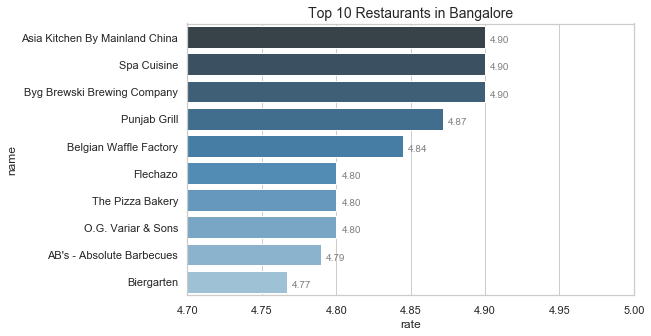

In [14]:
top_rating.iloc[1, 0] = 'Spa Cuisine'

# Plotting
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.barplot(y='name', x='rate', data=top_rating, palette='Blues_d')
ax.set_xlim([4.7, 5])
# format_spines(ax, right_border=False)

for p in ax.patches:
    width = p.get_width()
    ax.text(width+0.01, p.get_y() + p.get_height() / 2. + 0.2, '{:1.2f}'.format(width), 
            ha="center", color='grey')

ax.set_title('Top 10 Restaurants in Bangalore', size=14)
plt.show()

In [15]:
# apply title property to names of resturant
zomato_df.name = zomato_df.name.apply(lambda x : x.title())
# Replace yes no with bool values 
zomato_df.online_order.replace(('Yes','No'),(True,False),inplace=True)
zomato_df.book_table.replace(('Yes','No'),(True,False),inplace=True)
zomato_df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,type,area
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari


In [16]:
# factorize all variables except rate cost and votes
def factor(zomato_df):
    for col in zomato_df.columns[~zomato_df.columns.isin(['rate','cost','votes'])]:
        zomato_df[col] = zomato_df[col].factorize()[0]
    return zomato_df
zomato_factor = factor(zomato_df.copy())

# Heat Map representing coorelation among varables

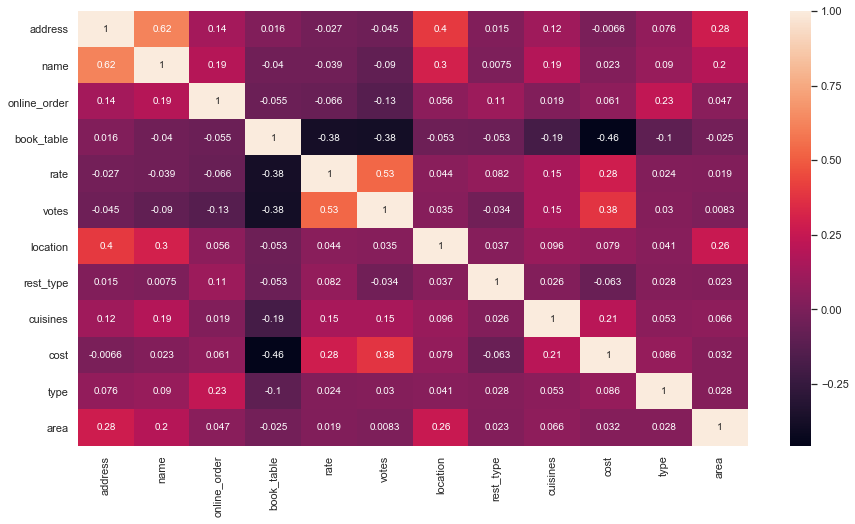

In [17]:
import matplotlib.pyplot as plt #It is a Plotting Library
import seaborn as sns
# coorelation matrix
corr_matrix = zomato_factor.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix,annot=True)


In [18]:
#standaradizng data using MinMaxScalar
from sklearn import preprocessing
scale = preprocessing.MinMaxScaler()
scale.fit(zomato_factor)
# zomato_factor = pd.DataFrame(scale.transform(zomato_factor),index = zomato_factor.index, columns = zomato_factor.columns)
zomato_factor.iloc[4:10]

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,type,area
4,4,4,1,1,3.8,166,1,0,4,600.0,0,0
5,5,5,0,1,3.8,286,1,0,5,600.0,0,0
6,6,6,1,1,3.6,8,2,0,6,800.0,0,0
7,7,7,0,0,4.6,2556,0,3,7,600.0,1,0
8,8,8,0,1,4.0,324,0,4,8,700.0,1,0
9,9,9,0,1,4.2,504,0,4,9,550.0,1,0


# Feature Selection

In [19]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# data = pd.read_csv("D://Blogs//train.csv")
X = zomato_factor.loc[:,zomato_factor.columns != 'rate']  #independent columns
y = zomato_factor[['rate']] #target column i.e price range
y =y.astype(int)
X =X.astype(int)

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=8)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(8,'Score'))  #print 10 best features
print("Top 5 features : ",X.columns[bestfeatures.get_support(indices = True)])

        Specs         Score
4       votes  1.723239e+07
8        cost  2.460350e+06
7    cuisines  1.071955e+06
1        name  2.009797e+05
0     address  5.252712e+04
6   rest_type  3.060406e+04
3  book_table  1.256129e+03
5    location  1.080821e+03
Top 5 features :  Index(['address', 'name', 'book_table', 'votes', 'location', 'rest_type',
       'cuisines', 'cost'],
      dtype='object')


In [20]:
#check for skewness
print(zomato_factor["cuisines"].skew())
print(zomato_factor["rest_type"].skew())
print(zomato_factor["location"].skew())
print(zomato_factor["votes"].skew())
print(zomato_factor["book_table"].skew())
print(zomato_factor["cost"].skew())
print(zomato_factor["name"].skew())

1.2590207776610056
2.453991989636071
0.9366094124206046
6.887626172432622
-1.934409707353885
2.4368143424548396
0.5126179753802054


In [21]:
#handle sknewness using squareroot tranformation
zomato_factor["cuisines"] = np.sqrt(zomato_factor["cuisines"])
print(zomato_factor["cuisines"].skew())
zomato_factor["rest_type"] = np.sqrt(zomato_factor["rest_type"])

zomato_factor["rest_type"] = np.sqrt(zomato_factor["rest_type"])

zomato_factor["rest_type"] = np.sqrt(zomato_factor["rest_type"])

zomato_factor["rest_type"] = np.sqrt(zomato_factor["rest_type"])
print(zomato_factor["rest_type"].skew())
zomato_factor["votes"] = np.sqrt(zomato_factor["votes"])

zomato_factor["votes"] = np.sqrt(zomato_factor["votes"])

zomato_factor["votes"] = np.sqrt(zomato_factor["votes"])
print(zomato_factor["votes"].skew())
zomato_factor["book_table"] = np.sqrt(zomato_factor["book_table"])

zomato_factor["book_table"] = np.sqrt(zomato_factor["book_table"])
print(zomato_factor["book_table"].skew())
zomato_factor["cost"] = np.sqrt(zomato_factor["cost"])

zomato_factor["cost"] = np.sqrt(zomato_factor["cost"])
print(zomato_factor["cost"].skew())

0.5526931530475028
-1.188277955569291
0.6627463826231975
-1.934409707353885
0.6840788829297667


# Assumption for testing Linearity

In [22]:
# Assumption  for multilinear Regression
# verififying multi colinearity among the selected features
selected_features = zomato_factor[['name','book_table','votes','location','cuisines','cost']]
selected_features.corr()

,name,book_table,votes,location,cuisines,cost
name,1.000000,-0.033870,-0.126025,0.448818,0.249910,0.042146
book_table,-0.033870,1.000000,-0.507346,-0.032831,-0.241246,-0.597832
votes,-0.126025,-0.507346,1.000000,0.021417,0.235411,0.539045
location,0.448818,-0.032831,0.021417,1.000000,0.141241,0.068674
cuisines,0.249910,-0.241246,0.235411,0.141241,1.000000,0.319242
cost,0.042146,-0.597832,0.539045,0.068674,0.319242,1.000000


In [24]:
# statiscal value of R2 
import statsmodels.formula.api as smf
model = smf.ols("rate ~ votes + cost + cuisines + rest_type + location + book_table + name", data= zomato_factor).fit()
model.summary()
# since not much different from linear r2 no overfitting

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rate   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     4545.
Date:                Mon, 04 May 2020   Prob (F-statistic):               0.00
Time:                        16:17:12   Log-Likelihood:                -12836.
No. Observations:               41202   AIC:                         2.569e+04
Df Residuals:                   41194   BIC:                         2.576e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5521      0.018    139.769      0.000       2.516       2.588
votes          0.6424      0.005    123.205      0.000       0.632       0.653
cost           0.0047      0.003      1.650      0.099      -0.001       0.010
cuisines       0.0015      0.000     10.850      0.000       0.001       0.002
rest_type      0.1037      0.004     29.039      0.000       0.097       0.111
location    5.175e-05   9.01e-05      0.574      0.566      -0.000       0.000
book_table    -0.1587      0.006    -26.873      0.000      -0.170      -0.147
name        1.907e-06   1.14e-06      1.670      0.095   -3.31e-07    4.15e-06
==============================================================================
Omnibus:                     9466.292   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25317.738
Skew:                          -1.235   Prob(JB):                         0.00
Kurtosis:                       5.940   Cond. No.                     3.44e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Model1 Residuals Probability Plot')

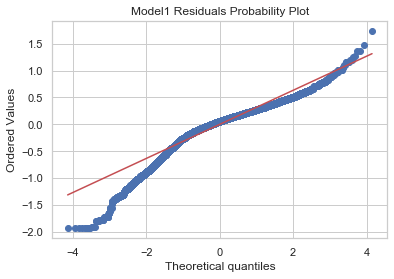

In [25]:
# assumption satisfied for linaerity
# residuals normally distributed
from scipy import stats
stats.probplot(model.resid, plot= plt)
plt.title("Model1 Residuals Probability Plot")

# Spliting Dataset into Training and testing

In [26]:
from sklearn.model_selection import train_test_split
#Defining the independent variables and dependent variables
x = selected_features
y = zomato_factor[['rate']]
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
x_train.head()
y_train.head()

,rate
21369,3.8
719,3.6
34095,3.8
5658,3.4
10794,3.8


# Multiple Regression Model

In [27]:
from sklearn.linear_model import LinearRegression
#Prepare a Linear REgression Model
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


# print(reg.score(x_test,y_test))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
y_pred_test = reg.predict(x_test)
y_pred_train = reg.predict(x_train)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train)) 
print("R Square Value: "+r2_score(y_test,y_pred).astype(str))
print("RMSE : "+rmse.astype(str))
print("RMSE for training set :" +rmse_train.astype(str) )
print("RMSE for test set :" +rmse_test.astype(str) )
print("MAE :" + mean_absolute_error(y_test, y_pred).astype(str))

R Square Value: 0.41513306009502315
RMSE : 0.3355519243075956
RMSE for training set :0.33321648412164956
RMSE for test set :0.3355519243075956
MAE :0.2413362290034037


# Cross Validation on Multiple Regression Model

In [28]:
from sklearn.model_selection import cross_val_score
cv_res = cross_val_score(reg, x, y, cv=4, scoring="r2")
print(cv_res.mean())

0.41788646632695575


# Gradient Boosting Regressor

In [30]:
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

model = GradientBoostingRegressor(n_estimators = 3,learning_rate = 1)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
# print(r2_score(y_test,y_pred))
# print(sqrt(mean_squared_error(y_test, y_pred)))
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train)) 
print("R Square Value: "+r2_score(y_test,y_pred).astype(str))
print("RMSE : "+rmse.astype(str))
print("RMSE for training set :" +rmse_train.astype(str) )
print("RMSE for test set :" +rmse_test.astype(str) )
print("MAE :" + mean_absolute_error(y_test, y_pred).astype(str))

R Square Value: 0.43804562368194033
RMSE : 0.32891352034084054
RMSE for training set :0.32624582729687285
RMSE for test set :0.32891352034084054
MAE :0.2373789861747171


C:\Users\pooja\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\pooja\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Cross Validation For GradientBoostingGradient

In [31]:
from sklearn.model_selection import cross_val_score
cv_res = cross_val_score(model, x, y, cv=4, scoring="r2")
print(cv_res.mean())

0.4273841688766338


C:\Users\pooja\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pooja\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pooja\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pooja\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

# KNN as Regressor Model

In [32]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(x_train,y_train)
y_pred=neigh.predict(x_test)
# print("R2 value: "+r2_score(y_test,y_pred).astype(str))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# print("RMSE "+rmse.astype(str))
y_pred_test = neigh.predict(x_test)
y_pred_train = neigh.predict(x_train)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train)) 
print("R Square Value: "+r2_score(y_test,y_pred).astype(str))
print("RMSE : "+rmse.astype(str))
print("RMSE for training set :" +rmse_train.astype(str) )
print("RMSE for test set :" +rmse_test.astype(str) )
print("MAE :" + mean_absolute_error(y_test, y_pred).astype(str))

R Square Value: 0.8665199804454129
RMSE : 0.16030214288006442
RMSE for training set :0.06933402401785524
RMSE for test set :0.16030214288006442
MAE :0.059620425201436754


# Cross Validation KNN as Regressor Model

In [33]:
from sklearn.model_selection import cross_val_score
cv_res = cross_val_score(neigh, x, y, cv=4, scoring="r2")
print(cv_res.mean())

0.6708644042135061


# Bayesian Ridge Model

In [34]:
from sklearn import linear_model
reg = linear_model.BayesianRidge()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
print(r2_score(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))
y_pred_test = reg.predict(x_test)
y_pred_train = reg.predict(x_train)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train)) 
print("rmse for training set :" +rmse_train.astype(str) )
print("rmse for test set :" +rmse_test.astype(str) )
print("mae :" + mean_absolute_error(y_test, y_pred).astype(str))

0.4151346275100727
0.33555147467584817
rmse for training set :0.3332164984821451
rmse for test set :0.33555147467584817
mae :0.241335930839662


C:\Users\pooja\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Cross validation for Byesian Ridge Model

In [35]:
from sklearn.model_selection import cross_val_score
cv_res = cross_val_score(reg, x, y, cv=4, scoring="r2")
print(cv_res.mean())

0.4178850977304874


C:\Users\pooja\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pooja\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pooja\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pooja\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

# LassoLars Model

In [36]:
from sklearn import linear_model
reg = linear_model.LassoLars(alpha=.1)
reg.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(r2_score(y_test,y_pred))
print(sqrt(mean_squared_error(y_test, y_pred)))
y_pred_test = reg.predict(x_test)
y_pred_train = reg.predict(x_train)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train)) 
print("rmse for training set :" +rmse_train.astype(str) )
print("rmse for test set :" +rmse_test.astype(str) )

0.43804562368194033
0.32891352034084054
rmse for training set :0.4402627378287544
rmse for test set :0.4387668262025589
